<a href="https://colab.research.google.com/github/muhammad-madridista/IntroductionToPytorch/blob/main/SimpleNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2(number of neurons) -->
  # output(3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Pick a random seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [9]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Change last columns from strings to integers
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-2411446934.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1).values
y = my_df['species'].values


In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [22]:
# Convert X features into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [23]:
# Convert y features into long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
# Set a criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr=learning rate (if error doesnt go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
# Train our model
# Epochs (one run thru all the training  data in our network)
epochs=100
losses=[]
for i in range(epochs):
  # go forward and get a prediction
  i+=1
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error it is gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch number: {i} and the loss: {loss}')

  # Do back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 10 and the loss: 0.04572628065943718
Epoch number: 20 and the loss: 0.040250614285469055
Epoch number: 30 and the loss: 0.03630662336945534
Epoch number: 40 and the loss: 0.033223651349544525
Epoch number: 50 and the loss: 0.030659856274724007
Epoch number: 60 and the loss: 0.027155935764312744
Epoch number: 70 and the loss: 0.023708714172244072
Epoch number: 80 and the loss: 0.020856210961937904
Epoch number: 90 and the loss: 0.018647102639079094
Epoch number: 100 and the loss: 0.01697133108973503


Text(0.5, 0, 'Epoch')

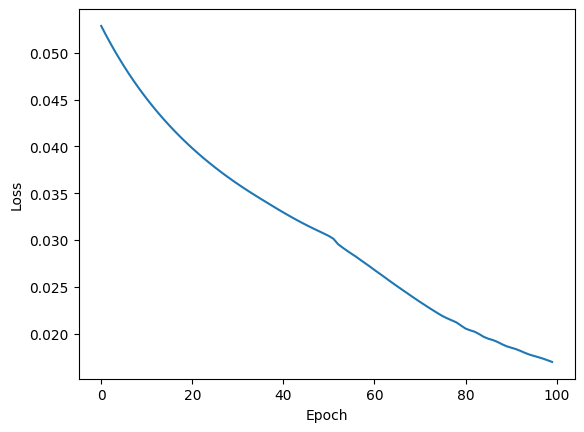

In [32]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [33]:
# Evaluate Model on test data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [34]:
loss

tensor(0.1816)

In [36]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)

    # It will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) \nPredicted Output: {torch.argmax(y_val)} \nActual Output: {y_test[i]}')

    # Correct or not
    if torch.argmax(y_val) == y_test[i]:
      correct+=1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')




1.) 
Predicted Output: 2 
Actual Output: 2
2.) 
Predicted Output: 2 
Actual Output: 2
3.) 
Predicted Output: 2 
Actual Output: 2
4.) 
Predicted Output: 1 
Actual Output: 1
5.) 
Predicted Output: 2 
Actual Output: 2
6.) 
Predicted Output: 1 
Actual Output: 1
7.) 
Predicted Output: 2 
Actual Output: 2
8.) 
Predicted Output: 1 
Actual Output: 1
9.) 
Predicted Output: 2 
Actual Output: 2
10.) 
Predicted Output: 2 
Actual Output: 2
11.) 
Predicted Output: 2 
Actual Output: 2
12.) 
Predicted Output: 0 
Actual Output: 0
13.) 
Predicted Output: 0 
Actual Output: 0
14.) 
Predicted Output: 1 
Actual Output: 1
15.) 
Predicted Output: 0 
Actual Output: 0
16.) 
Predicted Output: 1 
Actual Output: 2
17.) 
Predicted Output: 0 
Actual Output: 0
18.) 
Predicted Output: 2 
Actual Output: 1
19.) 
Predicted Output: 0 
Actual Output: 0
20.) 
Predicted Output: 0 
Actual Output: 0
21.) 
Predicted Output: 1 
Actual Output: 1
22.) 
Predicted Output: 2 
Actual Output: 2
23.) 
Predicted Output: 0 
Actual Output:

In [37]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [38]:
with torch.no_grad():
  print(model(new_iris))
  #print(torch.argmax(model(new_iris)))

tensor([ 12.1670,   2.2441, -21.1874])


In [39]:
newer_iris=torch.tensor([5.9,3.0,5.1,1.8])

In [40]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.2820,  3.8641,  9.3350])


In [41]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [42]:
# Load Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [43]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)